In [ ]:
pip install pandas scikit-learn matplotlib

In [ ]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, precision_recall_curve
import matplotlib.pyplot as plt


Step 1: Loading the dataset

In [ ]:
from google.colab import files
import pandas as pd

# Upload the file manually
uploaded = files.upload()

# Load the CSV (the uploaded file name will be used)
df = pd.read_csv(list(uploaded.keys())[0])

# Display basic information to confirm successful loading
print(df.info())
df.head()


Saving creditcard.csv to creditcard.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df['Time'] = pd.to_datetime(df['Time'], unit='s') # converting to datatime
df = df.sort_values('Time')

Step 2: Feature Engineering - Create Rolling Window Features

In [ ]:
df['Rolling_Amount_Sum'] = df['Amount'].rolling(window=24).sum().fillna(0)
df['Rolling_Amount_Mean'] = df['Amount'].rolling(window=24).mean().fillna(0)
df['Rolling_Transaction_Count'] = df['Amount'].rolling(window=24).count().fillna(0)

Step 3: Prepare the features and labels

In [ ]:
x = df[['Rolling_Amount_Sum', 'Rolling_Amount_Mean', 'Rolling_Transaction_Count']]
y = df['Class']

Step 4: Train-Test spliting (Time-based)

In [ ]:
train_size = int(0.7 * len(df))
x_train, x_test = x.iloc[:train_size], x.iloc[train_size:]
y_train, y_test = y.iloc[:train_size], y.iloc[train_size:]

Step 5: Training the Isolation Forest Model

In [ ]:
model = IsolationForest(contamination=0.02, random_state=42)
model.fit(x_train)

IsolationForest(contamination=0.02, random_state=42)

Step 6: Predicting Anomalies

In [ ]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

# Prediction conversion to 0 for normal and 1 for anomaly
y_pred_train = [1 if x == -1 else 0 for x in y_pred_train]
y_pred_test = [1 if x == -1 else 0 for x in y_pred_test]


Step 7: Evaluating the model

In [ ]:
print("Train Data classsification Report:")
print(classification_report(y_train, y_pred_train))

print("Train Data classsification Report:")
print(classification_report(y_test, y_pred_test))


Train Data classsification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99    198980
           1       0.00      0.01      0.00       384

    accuracy                           0.98    199364
   macro avg       0.50      0.50      0.50    199364
weighted avg       1.00      0.98      0.99    199364

Train Data classsification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     85335
           1       0.00      0.00      0.00       108

    accuracy                           0.98     85443
   macro avg       0.50      0.49      0.50     85443
weighted avg       1.00      0.98      0.99     85443



Step 8: Precision-Recall curve

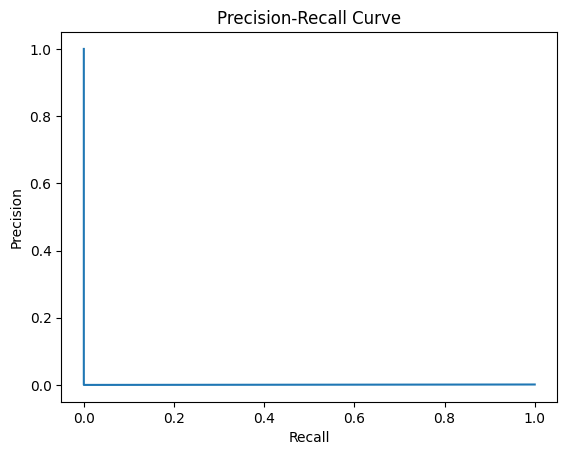

In [ ]:
precision, recall, _ = precision_recall_curve(y_test, y_pred_test)
plt.plot(recall, precision)
plt.title("Precision-Recall Curve")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.show()